# Step One: Import Python Libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

# Step Two: Load the Data into Pandas

In [2]:
df = pd.read_csv('dementia_dataset.csv')

In [3]:
print(df.shape)


(373, 15)


# Step Three: Data Preprocessing 

In [4]:
df.isnull().values.any()

True

In [5]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Subject.ID - Unique Id of the patient
MRI.ID - Unique Id generated after conducting MRI on patient
the observation is that Hand feature has only one unique value whereas Subject ID and MRI ID is of no use in our analysis so we will drop these three columns from the dataset.

so 12 feartures will be used in this analysis 

In [6]:
df=df.drop(['Subject ID','MRI ID','Hand'],axis=1)
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
df.isna().sum()


Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [8]:
df['SES'].fillna((df['SES'].median()), inplace=True)

In [9]:
df['MMSE'].fillna((df['MMSE'].median()), inplace=True)

# Section Four: Exploratory Data Analysis (EDA)


C:\Users\Fatema Nafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of patients')

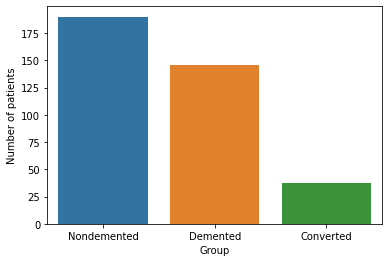

In [11]:
import seaborn as sns
sns.countplot(df.Group)
plt.ylabel('Number of patients')

In [12]:
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [13]:
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'

df['CDR'] = df['CDR'].apply(lambda x: cat_CDR(x))

In [14]:
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,Normal,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,Normal,2004,0.681,0.876
2,Demented,1,0,M,75,12,2.0,23.0,Dementia,1678,0.736,1.046
3,Demented,2,560,M,76,12,2.0,28.0,Dementia,1738,0.713,1.010
4,Demented,3,1895,M,80,12,2.0,22.0,Dementia,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,Dementia,1693,0.694,1.037
369,Demented,3,2297,M,86,16,1.0,26.0,Dementia,1688,0.675,1.040
370,Nondemented,1,0,F,61,13,2.0,30.0,Normal,1319,0.801,1.331
371,Nondemented,2,763,F,63,13,2.0,30.0,Normal,1327,0.796,1.323


In [15]:
df['Group'].value_counts()



Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [16]:
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable

In [17]:
df['CDR'] = df['CDR'].replace(['Normal','Dementia'], [0,1]) # M/F column


In [18]:
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0,1987,0.696,0.883
1,0,2,457,1,88,14,2.0,30.0,0,2004,0.681,0.876
2,1,1,0,1,75,12,2.0,23.0,1,1678,0.736,1.046
3,1,2,560,1,76,12,2.0,28.0,1,1738,0.713,1.010
4,1,3,1895,1,80,12,2.0,22.0,1,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,1,82,16,1.0,28.0,1,1693,0.694,1.037
369,1,3,2297,1,86,16,1.0,26.0,1,1688,0.675,1.040
370,0,1,0,0,61,13,2.0,30.0,0,1319,0.801,1.331
371,0,2,763,0,63,13,2.0,30.0,0,1327,0.796,1.323


In [19]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Group         1.000
Visit         1.000
MR Delay    873.000
M/F           1.000
Age          11.000
EDUC          4.000
SES           1.000
MMSE          3.000
CDR           1.000
eTIV        240.000
nWBV          0.056
ASF           0.194
dtype: float64


In [20]:
print(df.groupby('Group').size())


Group
0    190
1    183
dtype: int64


# Section five: Exploratory Data Analysis (EDA)

In [21]:
# Cross tabulation between diagnosis and concave points_worst

%matplotlib inline
CrosstabResult=pd.crosstab(index=df['Group'],columns=df['Age'])
print(CrosstabResult)

Age    60  61  62  63  64  65  66  67  68  69  ...  89  90  91  92  93  94  \
Group                                          ...                           
0       2   3   2   3   2   4   4   2   6   7  ...   5   3   3   2   3   1   
1       0   1   2   0   1   2   6   4   8   6  ...   2   2   1   2   0   0   

Age    95  96  97  98  
Group                  
0       1   0   1   0  
1       0   1   0   1  

[2 rows x 39 columns]


In [22]:
df['Group'].value_counts()


0    190
1    183
Name: Group, dtype: int64

In [23]:
df.describe()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.490617,1.882038,595.104558,0.428954,77.013405,14.597855,2.436997,27.351206,0.447721,1488.128686,0.729568,1.195461
std,0.500583,0.922843,635.485118,0.495592,7.640957,2.876339,1.109307,3.675329,0.497927,176.139286,0.037135,0.138092
min,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,0.000000,2.000000,552.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,1.000000,2.000000,873.000000,1.000000,82.000000,16.000000,3.000000,30.000000,1.000000,1597.000000,0.756000,1.293000
max,1.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,1.000000,2004.000000,0.837000,1.587000


In [24]:
df.Age.unique()

array([87, 88, 75, 76, 80, 90, 83, 85, 71, 73, 93, 95, 68, 69, 66, 78, 81,
       82, 77, 86, 92, 84, 72, 61, 64, 74, 60, 62, 91, 79, 89, 70, 94, 97,
       65, 67, 63, 96, 98], dtype=int64)

# Section six: Check for Perfect Multicollinearity


In [25]:
import matplotlib as plot

CrosstabResult=pd.crosstab(index=df['MMSE'],columns=df['Age']) 
%matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar()
plt.show()

UsageError: unrecognized arguments: # only needed for jupyter notebook


In [26]:
df=df.drop(['MR Delay','Visit'],axis=1)


In [27]:
df = df.reset_index(drop=True)

In [28]:
# calculate the correlation matrix
corr = df.corr()

# display the correlation matrix
display(corr)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,0.222146,-0.005941,-0.193060,0.038870,-0.520553,0.895866,-0.042700,-0.311346,0.032495
M/F,0.222146,1.000000,-0.037726,0.089279,-0.048504,-0.168530,0.265416,0.572549,-0.249618,-0.561647
Age,-0.005941,-0.037726,1.000000,-0.027886,-0.045410,0.055255,-0.020659,0.042348,-0.518359,-0.035067
EDUC,-0.193060,0.089279,-0.027886,1.000000,-0.691222,0.192158,-0.217428,0.257015,-0.012200,-0.241752
SES,0.038870,-0.048504,-0.045410,-0.691222,1.000000,-0.139943,0.102306,-0.249030,0.092361,0.240831
MMSE,-0.520553,-0.168530,0.055255,0.192158,-0.139943,1.000000,-0.566487,-0.036234,0.342189,0.044960
CDR,0.895866,0.265416,-0.020659,-0.217428,0.102306,-0.566487,1.000000,0.008015,-0.325932,-0.013254
eTIV,-0.042700,0.572549,0.042348,0.257015,-0.249030,-0.036234,0.008015,1.000000,-0.210122,-0.988877
nWBV,-0.311346,-0.249618,-0.518359,-0.012200,0.092361,0.342189,-0.325932,-0.210122,1.000000,0.213476
ASF,0.032495,-0.561647,-0.035067,-0.241752,0.240831,0.044960,-0.013254,-0.988877,0.213476,1.000000


In [29]:
corr.style.background_gradient(cmap='coolwarm')

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,0.222146,-0.005941,-0.193060,0.038870,-0.520553,0.895866,-0.042700,-0.311346,0.032495
M/F,0.222146,1.000000,-0.037726,0.089279,-0.048504,-0.168530,0.265416,0.572549,-0.249618,-0.561647
Age,-0.005941,-0.037726,1.000000,-0.027886,-0.045410,0.055255,-0.020659,0.042348,-0.518359,-0.035067
EDUC,-0.193060,0.089279,-0.027886,1.000000,-0.691222,0.192158,-0.217428,0.257015,-0.012200,-0.241752
SES,0.038870,-0.048504,-0.045410,-0.691222,1.000000,-0.139943,0.102306,-0.249030,0.092361,0.240831
MMSE,-0.520553,-0.168530,0.055255,0.192158,-0.139943,1.000000,-0.566487,-0.036234,0.342189,0.044960
CDR,0.895866,0.265416,-0.020659,-0.217428,0.102306,-0.566487,1.000000,0.008015,-0.325932,-0.013254
eTIV,-0.042700,0.572549,0.042348,0.257015,-0.249030,-0.036234,0.008015,1.000000,-0.210122,-0.988877
nWBV,-0.311346,-0.249618,-0.518359,-0.012200,0.092361,0.342189,-0.325932,-0.210122,1.000000,0.213476
ASF,0.032495,-0.561647,-0.035067,-0.241752,0.240831,0.044960,-0.013254,-0.988877,0.213476,1.000000


In [30]:
# The (10) highest Correlation varibles with diagnosis
def max_Corr():
    return corr['SES'].nlargest(10)

max_Corr() 

SES      1.000000
ASF      0.240831
CDR      0.102306
nWBV     0.092361
Group    0.038870
Age     -0.045410
M/F     -0.048504
MMSE    -0.139943
eTIV    -0.249030
EDUC    -0.691222
Name: SES, dtype: float64

Looking at the heatmap along with the correlation matrix we can identify a few highly correlated variables. For example, if you look at the correlation between perimeter_mean and radius_mean with diagnosis.it ends up at almost 0.997855, 0.986507. This is an extremely high correlation and marks it as a candidate to be removed.  

in this example any of the variables come back with a value of 5 or higher, then they should be removed from the model.

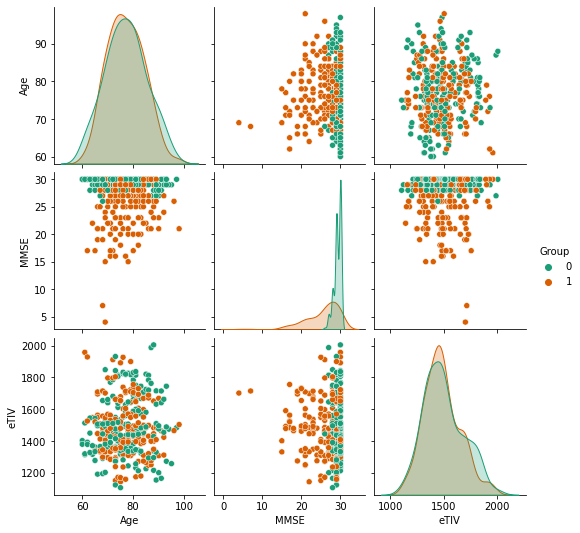

In [32]:
sns.pairplot(df, vars = ['Age', 'MMSE', 'eTIV'], hue ='Group',palette='Dark2')

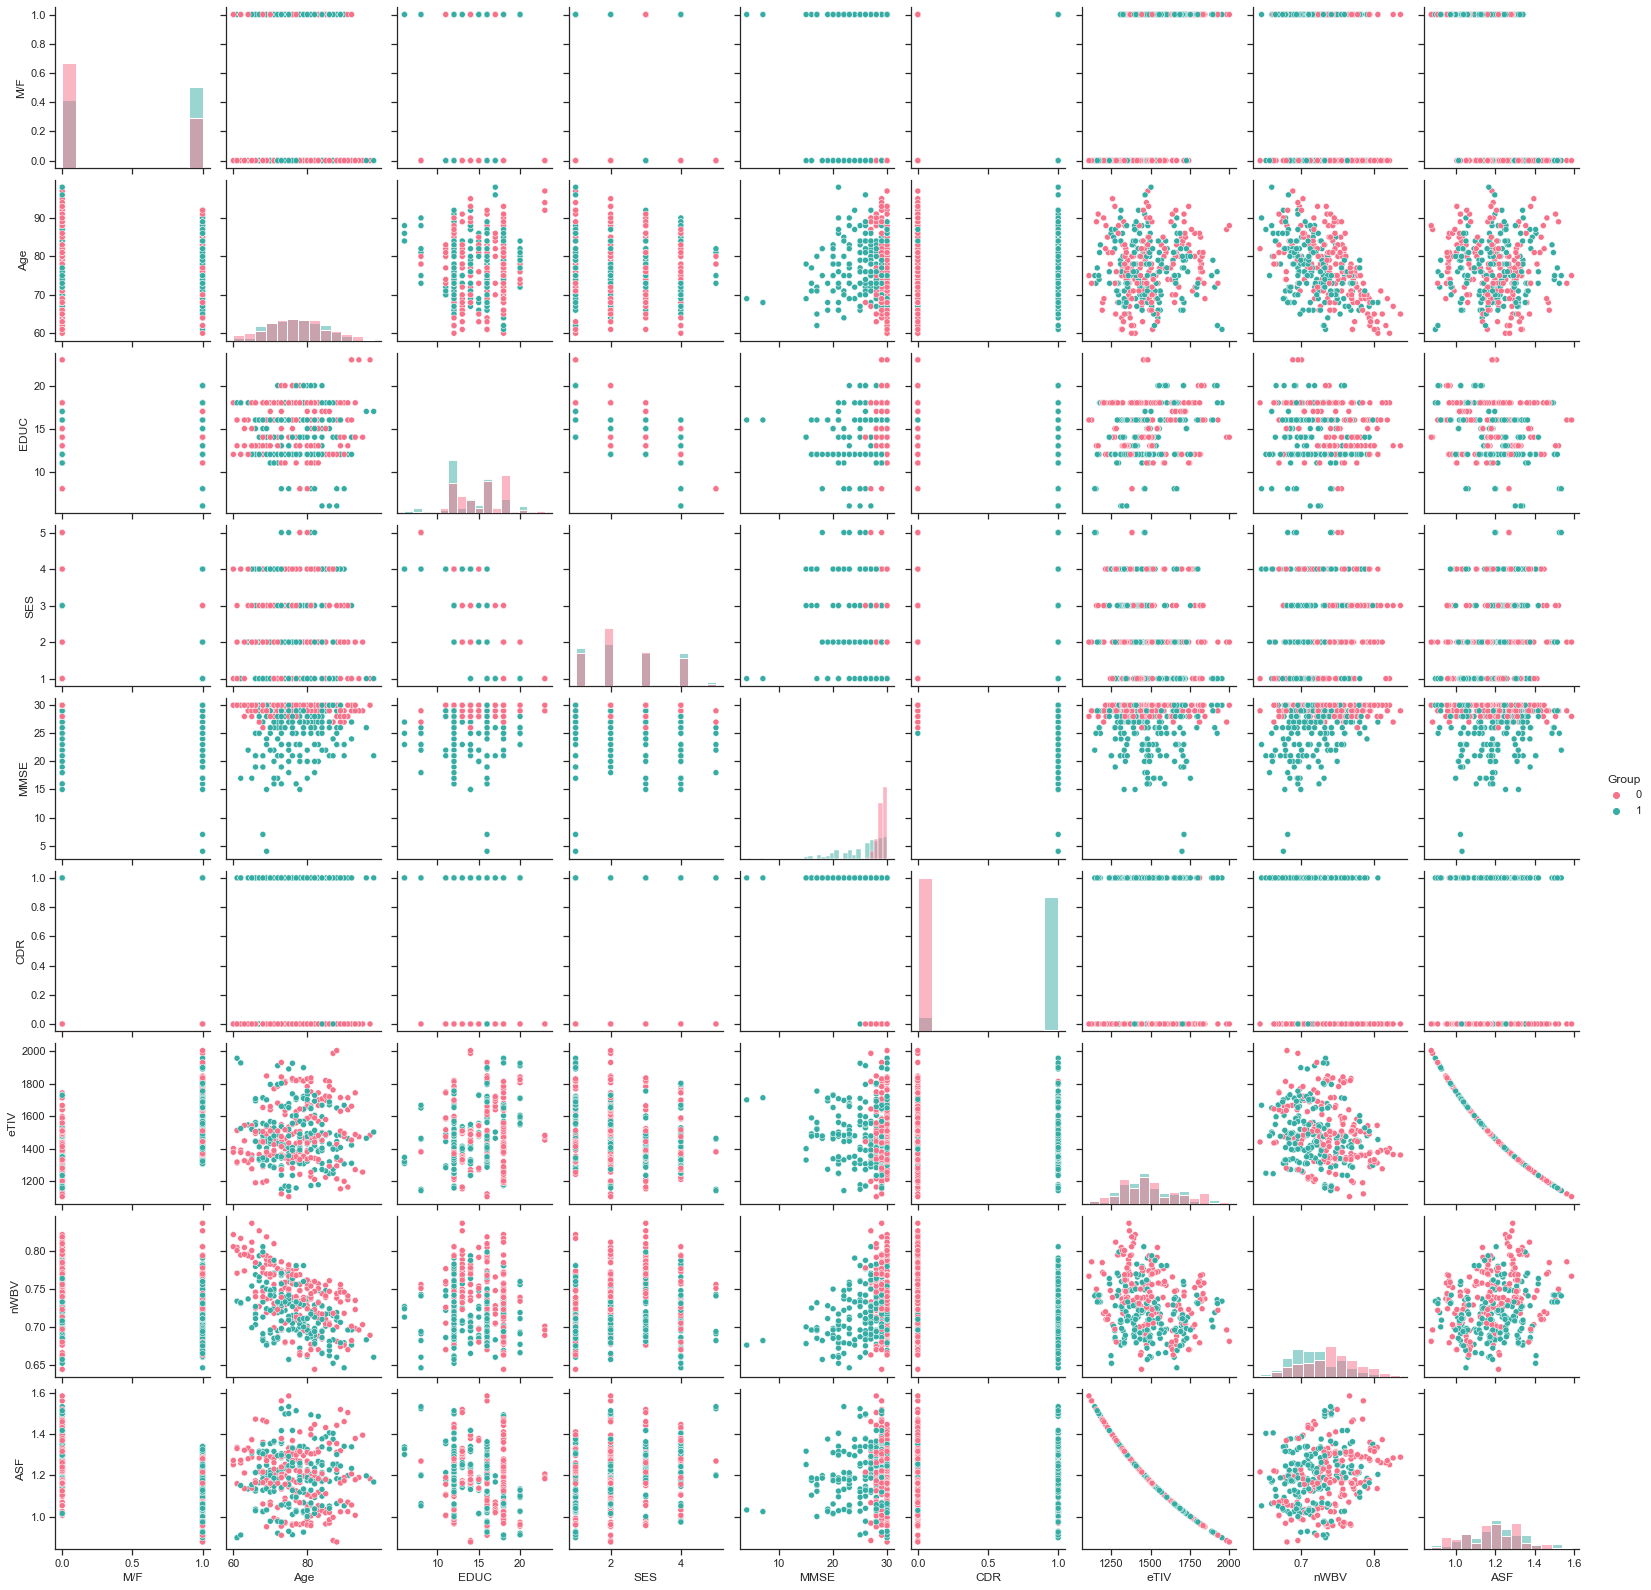

In [35]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue='Group',palette='husl',diag_kind = 'hist');


Group
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

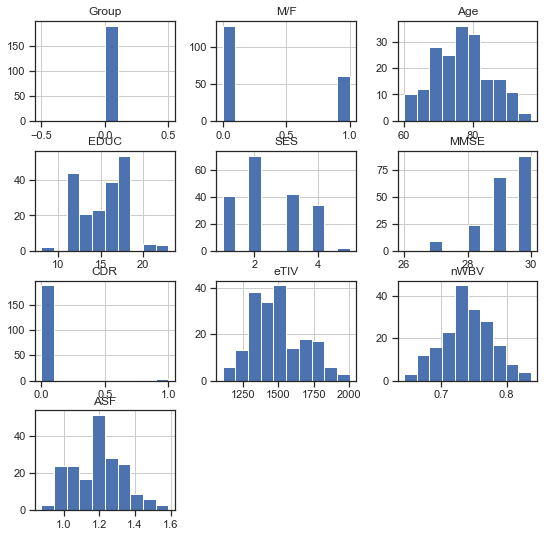

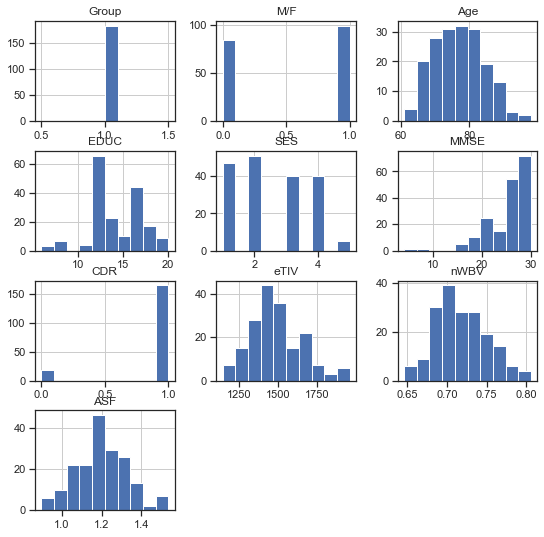

In [36]:
df.groupby('Group').hist(figsize=(9, 9))

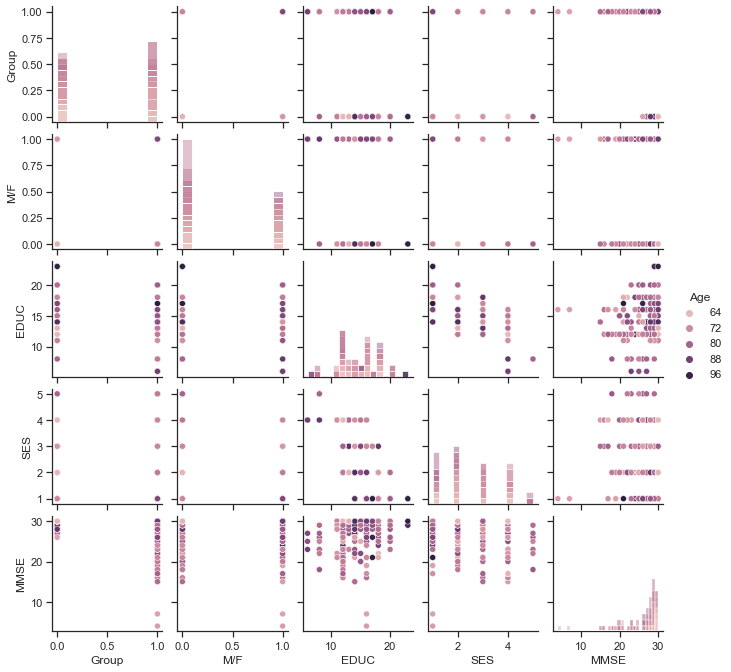

In [38]:
sns.pairplot(df.iloc[:,:6],hue='Age', diag_kind='hist',height=1.9 )

The most popular machine learning algorithms implemented in the scikit-learn library, such as:

Support Vector Machines (SVM).
Classification and Regression Trees (CART).
Random Forest Classifier
AdaBoo


# Section Seven: Data Normalization


C:\Users\Fatema Nafa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(10.3, 30.0)

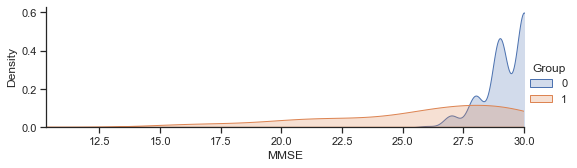

In [39]:

facet= sns.FacetGrid(df,hue="Group", aspect=3,height=4, size=2.5)


facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(10.30)



C:\Users\Fatema Nafa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(10.3, 1.0)

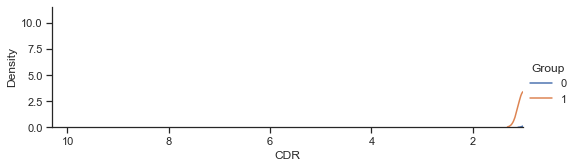

In [41]:
facet= sns.FacetGrid(df,hue="Group", aspect=3,height=4, size=2.5)


facet.map(sns.kdeplot,'CDR')
facet.set(xlim=(0, df['CDR'].max()))
facet.add_legend()
plt.xlim(10.30)

In [42]:
df.describe()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.490617,0.428954,77.013405,14.597855,2.436997,27.351206,0.447721,1488.128686,0.729568,1.195461
std,0.500583,0.495592,7.640957,2.876339,1.109307,3.675329,0.497927,176.139286,0.037135,0.138092
min,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,0.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,1.000000,1.000000,82.000000,16.000000,3.000000,30.000000,1.000000,1597.000000,0.756000,1.293000
max,1.000000,1.000000,98.000000,23.000000,5.000000,30.000000,1.000000,2004.000000,0.837000,1.587000


In [43]:
Y = df[["Group"]]
X= df.drop(['Group'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)


In [44]:
X.shape

(373, 9)

In [45]:
Y.shape

(373, 1)

In [90]:
# Display the summary
Df_Summary = df.describe()

# add the standard deviation metric
Df_Summary.loc['+3_std'] = Df_Summary.loc['mean'] + (Df_Summary.loc['std'] * 3)
Df_Summary.loc['-3_std'] = Df_Summary.loc['mean'] - (Df_Summary.loc['std'] * 3)

Df_Summary

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.490617,0.428954,77.013405,14.597855,2.436997,27.351206,0.447721,1488.128686,0.729568,1.195461
std,0.500583,0.495592,7.640957,2.876339,1.109307,3.675329,0.497927,176.139286,0.037135,0.138092
min,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,0.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,1.000000,1.000000,82.000000,16.000000,3.000000,30.000000,1.000000,1597.000000,0.756000,1.293000
max,1.000000,1.000000,98.000000,23.000000,5.000000,30.000000,1.000000,2004.000000,0.837000,1.587000
+3_std,1.992367,1.915729,99.936277,23.226874,5.764920,38.377193,1.941503,2016.546543,0.840973,1.609737
-3_std,-1.011134,-1.057820,54.090533,5.968837,-0.890925,16.325220,-1.046061,959.710830,0.618163,0.781185


In [91]:
df.groupby(['EDUC'])['SES'].median()


EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

# Section Eight:Machine Learning Models


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [56]:
print(X.shape)
print(Y.shape)

# Look at the dataset again
print(f'Number of Rows: {X.shape[0]}')
print(f'Number of Columns: {Y.shape[1]}')
print(df.head())

print('Feature vector:', X.shape)
print('Target vector:', Y.shape)


# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

(373, 9)
(373, 1)
Number of Rows: 373
Number of Columns: 1
   Group  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0      0    1   87    14  2.0  27.0    0  1987  0.696  0.883
1      0    1   88    14  2.0  30.0    0  2004  0.681  0.876
2      1    1   75    12  2.0  23.0    1  1678  0.736  1.046
3      1    1   76    12  2.0  28.0    1  1738  0.713  1.010
4      1    1   80    12  2.0  22.0    1  1698  0.701  1.034
Feature vector: (373, 9)
Target vector: (373, 1)


In [57]:
# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

In [58]:
# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

In [96]:
import warnings
warnings.filterwarnings("ignore")
acc=[]
best_score=0
kfolds=5 

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: 
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: 
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']:
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) 
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            score = np.mean(scores)
            if score > best_score:
                best_score = score 
                best_parameter_c = c_paramter 
                best_parameter_gamma = gamma_paramter 
                best_parameter_k = k_parameter
            

SVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

test_score = SVMmodel.score(X_test_scaled, Y_test)
PredictedResult = SVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedResult, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedResult, pos_label=1)
test_auc = auc(fpr, tpr)
#============================================================
print("1. Support Vector Machine")
print("The accuracy on cross validation set is:", best_score)
print("The parameter for c is: ", best_parameter_c)
print("The parameter for gamma is: ", best_parameter_gamma)
print("The parameter for kernel is: ", best_parameter_k)
print("The accuracy with the best parameters is", test_score)
print("The recall with the best parameters is", test_recall)
print("The performance measure AUC", test_auc)

model = 'Support Vector Machine'
acc.append([model, test_score, test_recall, test_auc, fpr, tpr, thresholds])
#===========================================================================

1. Support Vector Machine
The accuracy on cross validation set is: 0.9464285714285715
The parameter for c is:  1
The parameter for gamma is:  10
The parameter for kernel is:  rbf
The accuracy with the best parameters is 0.925531914893617
The recall with the best parameters is 0.9090909090909091
The performance measure AUC 0.9245454545454544


In [97]:
import warnings
warnings.filterwarnings("ignore")

best_score = 0


DecisionTreeModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )

test_score = DecisionTreeModel.score(X_test_scaled, Y_test)
PredictedResult = DecisionTreeModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedResult, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedResult, pos_label=1)
test_auc = auc(fpr, tpr)

print("2. Decision Tree Model")

print("The accuracy on validation set is:", best_score)
print("The parameter for the maximum depth is: ", best_parameter)
print("The accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("The performance measure AUC is ", test_auc)

model = 'Decision Tree'
acc.append([model, test_score, test_recall, test_auc, fpr, tpr, thresholds])

2. Decision Tree Model
The accuracy on validation set is: 0
The parameter for the maximum depth is:  1
The accuracy with best parameter is  0.9468085106382979
Test recall with best parameters is  0.9090909090909091
The performance measure AUC is  0.9445454545454545


In [98]:
import warnings
warnings.filterwarnings("ignore")

best_score = 0

for M in range(2, 15, 2):
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        scores = cross_val_score(boostModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        score = np.mean(scores)

        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

AdaBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedResult = AdaBoostModel.predict(X_test_scaled)
test_score = AdaBoostModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedResult, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedResult, pos_label=1)
test_auc = auc(fpr, tpr)
print("3. AdaBoost Model")
print("The accuracy on validation set is:", best_score)
print("The parameter of M is: ", best_M)
print("The parameter of LR is: ", best_lr)
print("The accuracy with the best parameter is", test_score)
print("The recall with the best parameters is:", test_recall)
print("The AUC with the best parameters is:", test_auc)

model = 'AdaBoost'
acc.append([model, test_score, test_recall, test_auc, fpr, tpr, thresholds])

3. AdaBoost Model
The accuracy on validation set is: 0.9464285714285714
The parameter of M is:  2
The parameter of LR is:  0.0001
The accuracy with the best parameter is 0.8723404255319149
The recall with the best parameters is: 0.9090909090909091
The AUC with the best parameters is: 0.8745454545454546


In [99]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '0.0'],
       ['CDR', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U32')

In [100]:
import warnings
warnings.filterwarnings("ignore")


RandomForestModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedResult = RandomForestModel.predict(X_test_scaled)
test_score = RandomForestModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedResult, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedResult, pos_label=1)
test_auc = auc(fpr, tpr)

print("4. Random Forest")
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with tdhe best parameters is:", test_auc)

model = 'Random Forest'
acc.append([model, test_score, test_recall, test_auc, fpr, tpr, thresholds])

4. Random Forest
Best accuracy on validation set is: 0.9464285714285714
Best parameters of M, d, m are:  2 5 6
Test accuracy with the best parameters is 0.9361702127659575
Test recall with the best parameters is: 0.9090909090909091
Test AUC with tdhe best parameters is: 0.9345454545454546


In [101]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

best_score = 0

xgbModel = xgb.XGBClassifier().fit(X_trainval_scaled, Y_trainval )
PredictedResult = xgbModel.predict(X_test_scaled)
test_score = xgbModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedResult, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedResult, pos_label=1)
test_auc = auc(fpr, tpr)

print("5. XGBClassifier")
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with tdhe best parameters is:", test_auc)

model = 'xgbModel'
acc.append([model, test_score, test_recall, test_auc, fpr, tpr, thresholds])

[12:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
5. XGBClassifier
Best accuracy on validation set is: 0
Best parameters of M, d, m are:  2 5 6
Test accuracy with the best parameters is 0.9361702127659575
Test recall with the best parameters is: 0.9318181818181818
Test AUC with tdhe best parameters is: 0.9359090909090908


In [102]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.002699112583638717'],
       ['Age', '0.029798004595539485'],
       ['EDUC', '0.011603973805856373'],
       ['SES', '0.021379180405082528'],
       ['MMSE', '0.024942339190150334'],
       ['CDR', '0.7761529833079945'],
       ['eTIV', '0.053221186565481415'],
       ['nWBV', '0.0379219869539893'],
       ['ASF', '0.04228123259226721']], dtype='<U32')

# Section Nine:Comparison Result 


In [103]:
#The accuray for all models
result = pd.DataFradme(acc, columns=['ML Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['ML Model', 'Accuracy', 'Recall', 'AUC']]

,ML Model,Accuracy,Recall,AUC
0,Support Vector Machine,0.925532,0.909091,0.924545
1,Decision Tree,0.946809,0.909091,0.944545
2,AdaBoost,0.872340,0.909091,0.874545
3,Random Forest,0.936170,0.909091,0.934545
4,xgbModel,0.936170,0.931818,0.935909
